# Clase 18 de mayo de 2023 #
## Fundamentos de Probabilidad ##
### Probabilidad ###
La probabilidad es el marco que nos permite cuantificar la incertidumbre.  

**Espacio muestral:** Es el conjunto de todos los posibles resultados de un experimento y se le denota por $\Omega$.

**Evento:** Subconjunto del espacio muestral.

**Axiomas** de la probabilidad:
1. $0 \leq P(A) \leq 1$
2. $P(\Omega)=1$
3. $P(A_1\cup A_2\cup ... \cup A_n)=\sum_{i=1}^n P(A_i)$ si los eventos $A_n$ son mutuamente excluyentes

$ P(A^c) = 1 - P(A) $

Por ejemplo si nuestro experimento es lanzar un dado de 6 caras entonces, $\Omega=[1,2,3,4,5,6]$ y $A$ sea el evento  

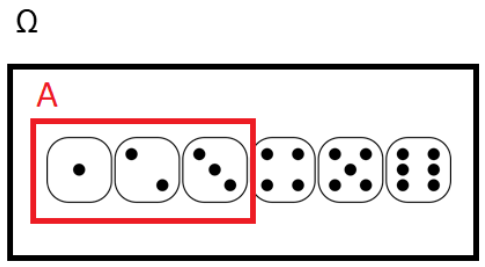

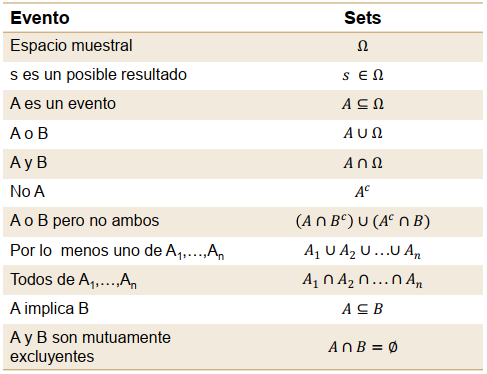


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [ ]:
# Operaciones con sets
A = set([1,2,2,2,2])
B = set([3,4])

print('A:', A)
print('B:', B)

# Añadir elementos a un set
A.update([3,4,5,6])
print(A)

In [ ]:
# Quitar elementos de un set
A.remove(6)
print('A:',A)

In [ ]:
# Verificar si un elemento est dentro de un set
print(10 in A)

# Subset
print('B es un subset de A:', B.issubset(A))
print('A es un subset de B:',A.issubset(B))

# Union
C = set([5,6,7,8,9,10])
print('A:', A)
print('C:', C)
print('Union:',A.union(C))
print('Union:',(C|A))

# Interseccion
print(A.intersection(C))
print(A&C)

# Diferencia contiene todos los elementos en A pero no en C
print(A.difference(C))

# Diferencia simetrica nos va a dar el conjunto de todos los elementos que estan en uno de los conjuntos pero no en ambos
print(A.symmetric_difference(C))

Algunos espacios muestrales, como en el caso del dado, tienen resultados igualmente probables. En esos casos el cálculo de la probabilidad se vuelve un problema de conteo:  
$ P(A) = \frac{\#\;resultados\;favorables\;A}{\#\;resultados\;totales\;\Omega} $

$ P(E) = lim_{n->\infty} \frac{n(E)}{n} $

In [ ]:
@widgets.interact(n_tiros=(10,10000,10), continuous_update=False)
def simular_dado(n_tiros=10):
    resultados = [1,2,3,4,5,6]
    tiros = np.random.choice(resultados, p=[1/6.]*6, size=n_tiros)
    
    # Contar cuantos resultados tenemos de cada numero
    count = []
    for i in range(len(resultados)):
        count.append(sum(tiros==i+1)/n_tiros)
    
    plt.bar(np.arange(1,7),count)
    plt.ylim(0,0.5)
    plt.show()

In [ ]:
# Probabilidad de lanzar un dardo
plt.axes()
rectangle = plt.Rectangle((-1, -1), 2, 2, ec='blue')
circle = plt.Circle((0,0),1,ec='red')
plt.gca().add_patch(rectangle)
plt.gca().add_patch(circle)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.show()

La probabilidad de que un punto aleatorio $(x,y)$ se encuentre dentro del círculo es la razón del área del círculo dividido entre el área del cuadrado. Es decir:  

$ P(punto\;dentro\;de\;circulo) = \frac{\pi *r^2}{r^2}*\frac{1}{4} = \frac{\pi}{4} $

Con esto podemos estimar el valor de pi, a este método se le conoce como "Integración Monte Carlo"

### Probabilidad condicional ###
La probabilidad condicional generalmente se utiliza para examinar eventos en subconjuntos del espacio muestral. Específicamente, estamos interesados en la probabilidad de que un evento ocurra solo si otro evento ha ocurrido primero. Por ejemplo: la probabilidad de que una institución financiera quiebre dado que otra institución financiera ha quebrado.  
$ P(A|B)=\frac{P(A\cap B)}{P(B)} $  

*Ejemplo:* Fallos de SIFIs (Systemically Important Financial Institutions)  
Supongamos que la probabilidad de que falle por lo menos una institución financiera en un año cualquiera es del 1%.  
Supongamos que si quiebra una institución financiera entonces hay un 20% de probabilidad de que el numero de instituciones que fallen sea exactamente 1, 2, 3, 4 o 5.  

Para un año cualquiera ¿cuál es la probabilidad de que falle (exactamente) una institución?  
**0.20%**

¿Cuál sería la probabilidad de que fallen por lo menos dos instituciones financieras dado que falló por lo menos una?  
**80%**

### Independencia ###
Se dice que dos eventos son independientes si el resultado de un evento no altera tu expectativa sobre si el otro evento ocurrirá o no.  
$P(A|B)=P(A)$  
$ P(A\cap B) = P(A)P(B) $ 

**Ejercicio:**
![Diagrama](img/probabilidad_diagrama.png)


Dada la imagen anterior, calcula:  
1. $ P(A) = 48\% $
1. $ P(A|B) = 38.2\% $
1. $ P(B|A) = 43.8\% $
1. $ P(A\cap B\cap C) = 10\% $ 
1. $ P(B|A\cap C) = 40\% $ 
1. $ P(A\cap B|C) = 18.9\% $ 
1. $ P(A\cup B|C) = 81.1\% $ 
1. ¿Alguno de estos pares de eventos es independiente? No

**Ejercicio**  
Si es un volado que un administrador de un portafolio tenga mejores rendimientos anuales que su benchmark, y los rendimientos anuales son independientes, ¿cuál es la probabilidad de que un administrador de un portafolio obtenga mejores rendimientos que el benchmark 10 años seguidos?

### Variables Aleatorias ###  
Es una función que asigna un número a los eventos de un espacio muestral.  
*Discretas*: Solo pueden tomar ciertos valores discretos.  
*Continuas*: Pueden tomar cualquier valor, generalmente hablando, dentro de cierto intevalo  

Ejemplos: precio de un asset, retornos, tasas de interés, P&L de un portafolio, etc...


Se utilizan principalmente dos funciones para describir las propiedades de la distribución de una variable aleatoria.  
**Distribuciones de probabilidad**  
$X_k$ discreta (PMF): $\sum_k P(X_k)=1$  
$X$ continua (PDF): $\int_{-\infty}^{\infty}P(X)dX=1$

**Función de distribución acumulada**  
La función de distribución acumulada, o CDF por sus siglas en inglés, nos da la probabilidad de que X es igual o menor que un valor dado.  
$ F(x)=P(X<x)=\int_{-\infty}^x P(x)dx $  

$ p(x) = \frac{dF(x)}{dx} $  

$ P(a < X < b) = F(b) - F(a) $  

### Momentos ###  
**Valor esperado**: Promedio ponderado por probabilidad.  
$E[X]=\sum xP(X=x)$  

Las funciones de variables aleatorias también son variables aleatorias.  
$E[f(X)]=\sum f(x)P(X=x)$


### Opciones ###
Son contratos en los que el comprador adquiere el derecho, más no la obligación, de comprar o vender un subyacente a un precio previamente pactado. El vendedor SÍ tiene la obligación de comprarle o venderle el subyacente al comprador de la opción.  

Por tipo de opción:
- Puts: Opción de vender
- Calls: Opción de compra  

Por fecha de ejercicio:
- Americanas: Se puede ejercer la opción en cualquier fecha antes del vencimiento.
- Europeas: Se puede ejercer la opción solo en el vencimiento.
- Mixtas: Durante cierto plazo son europeas y durante otro plazo son americanas.

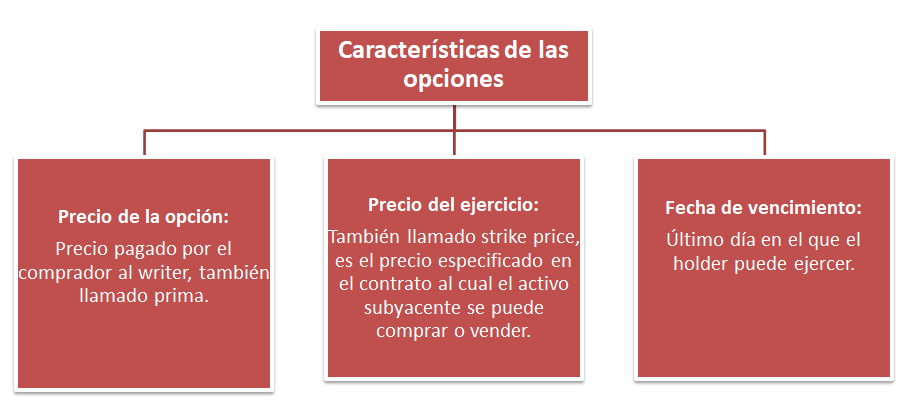

**Payoff de una opción**  
$ S $: precio subyacente  
$ K $: precio pactado o strike  
Call: $ Payoff = max(0, S-K) $  
Put: $ Payoff = max(0, K-S) $

**Ejemplo**  
Para valuar un call necesitamos el valor esperado de una función del precio.  
Supongamos que el valor de un asset $S$ tomará uno de tres valores $(20, 50, 100)$ dentro de un año con probabilidades de $0.2, 0.5\;y\;0.3$ respectivamente. Si el strike de la opción es $40$. ¿Cuál es el valor esperado del payoff?